<center>
 
### ANLY 590 | Homework 0
### Kendra Gedney | kg729@georgetown.edu 

<center>


***

**1. Regularization**

**Using the accompanying Hitters dataset, we will explore regression models to predict a player's Salary from other variables. You can use any programming languages or frameworks that you wish.**

https://gist.github.com/keeganhines/59974f1ebef97bbaa44fb19143f90bad 

#### Prep

In [1]:
#- prep
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#- set seed
np.random.seed(123)

#- import data
url = 'https://gist.githubusercontent.com/keeganhines/59974f1ebef97bbaa44fb19143f90bad/raw/d9bcf657f97201394a59fffd801c44347eb7e28d/Hitters.csv'
df = pd.read_csv(url)

#### Pre Processing

In [2]:
#- preprocessing
df = df.rename(columns={'Unnamed: 0': 'player_name'})
df = df.dropna() # drop missing values
#df.dtypes # check data types

**1.1**

_First we create a baseline model, predicting `Salary` from the other numeric predictors just using multiple linear regression, so all predictors are used in this model. The resulting RMSE is 306.43._ 

In [3]:
# set response 
y = df['Salary']

#-set predictors, only include 'int64'
X = df.select_dtypes(include=['int64'])
X_values = X.values # converts to numpy array 

# split test and train
# ref: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html 
X_train, X_test, y_train, y_test = train_test_split(X_values, y, test_size=0.25, random_state=18)

In [4]:
# fit model and check RMSE
baseline_model = linear_model.LinearRegression(normalize=True).fit(X_train, y_train)
y_preds = baseline_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_preds))

306.4349531610594

** a) Use LASSO regression to predict Salary from the other numeric predictors (you should omit the categorical predictors)**
** b) Create a visualization of the coefficient trajectories.  **   
** c) Comment on which are the final three predictors that remain in the model.  **


_Below we show the plots for the coefficients as the value of `alpha` is increased in the LASSO model, constraining the coefficient values, and forcing them towards 0. The final three predictors that remain in the model are: `RBI`, `Walks`, and `CRBI`._

In [5]:
# set values of alpha to test
alphas = np.logspace(-3, 2, 100)

# create dict of coef values for each alpha
values = []
for alpha in alphas:
    lasso_model = linear_model.Lasso(alpha=alpha, max_iter=5000, normalize=True).fit(X_train, y_train)
    values.append(lasso_model.coef_)

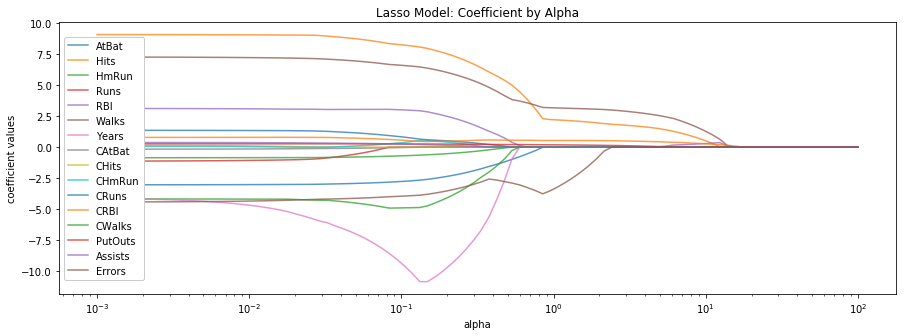

In [6]:
# plot trajectory 
plt.figure(figsize=(15, 5))

plt.plot(alphas, values, alpha=0.75)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('coefficient values')
plt.title('Lasso Model: Coefficient by Alpha')
plt.legend(X.columns, loc='center left', framealpha=1.0)
plt.show()

In [7]:
# check remaining three predictors
list(zip(X.columns, values[82]))

[('AtBat', 0.0),
 ('Hits', 0.0),
 ('HmRun', 0.0),
 ('Runs', 0.0),
 ('RBI', 0.08711315163075142),
 ('Walks', 0.13195932901674257),
 ('Years', 0.0),
 ('CAtBat', 0.0),
 ('CHits', 0.0),
 ('CHmRun', 0.0),
 ('CRuns', 0.0),
 ('CRBI', 0.1479019512010177),
 ('CWalks', 0.0),
 ('PutOuts', 0.0),
 ('Assists', -0.0),
 ('Errors', -0.0)]

** d) Use cross-validation to find the optimal value of the regularization penality.**  
** e) How many predictors are left in that model?**

_Here we use CV to find the optimal value of `alpha`. We find that `alpha=0.167` is optimal. The resulting RMSE is 301.20, better than the baseline model above._

_There are 14 predictors left in this model, since 3 predictors are set to 0 by the model._ 

In [8]:
#- run cv to fit models
# ref: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html 
lasso_model_cv = linear_model.LassoCV(cv=10, alphas=alphas, max_iter=5000, normalize=True).fit(X_train, y_train)
best_alpha = lasso_model_cv.alpha_
best_alpha

0.1668100537200059

In [9]:
# calculate MSE for the optimized model (with alpha set to best_alpha)
lasso_model_cv = linear_model.Lasso(alpha=best_alpha, max_iter=5000, normalize=True).fit(X_train, y_train)
y_preds = lasso_model_cv.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_preds))

301.200458219232

In [10]:
#- display coefficient values for model
list(zip(X.columns, lasso_model_cv.coef_))   

[('AtBat', -2.5202657231705055),
 ('Hits', 7.814143118658996),
 ('HmRun', -4.510476843910263),
 ('Runs', 0.0),
 ('RBI', 2.715503918140103),
 ('Walks', 6.258133366084423),
 ('Years', -10.48958035647286),
 ('CAtBat', -0.0),
 ('CHits', 0.0),
 ('CHmRun', 0.48120705769636557),
 ('CRuns', 0.5599211428838027),
 ('CRBI', 0.458991891620512),
 ('CWalks', -0.5901170514854618),
 ('PutOuts', 0.2456889777810478),
 ('Assists', 0.17317601321583992),
 ('Errors', -3.7156215669252775)]

**1.2 **   
* **Repeat with Ridge Regression. Visualize coeffecient trajectories. Use cross-validation to find the optimal value of the regularization penalty.**

_The trajectory plot for Ridge is below. Again, the coefficeints come close to zero, but are not pushed to be zero._

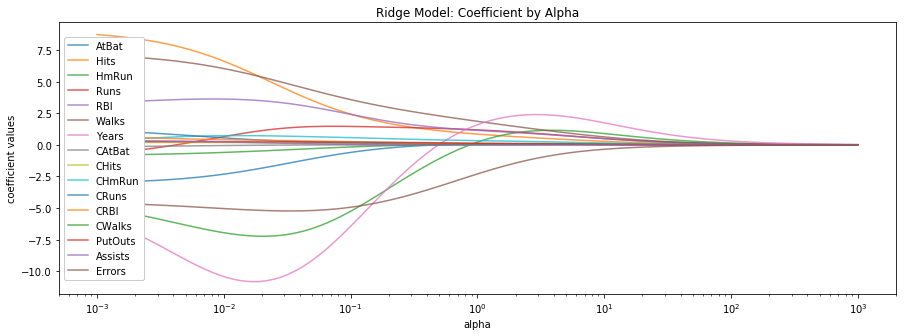

In [11]:
# set values of alpha to test (note these are different than for Lasso)
alphas = np.logspace(-3, 3, 100)

# create dict of coef values for each alpha
values = []
for alpha in alphas:
    ridge_model = linear_model.Ridge(alpha=alpha, max_iter=5000, normalize=True).fit(X_train, y_train)
    values.append(ridge_model.coef_)
    
# plot trajectory 
plt.figure(figsize=(15, 5))

plt.plot(alphas, values, alpha=0.75)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('coefficient values')
plt.title('Ridge Model: Coefficient by Alpha')
plt.legend(X.columns, loc='center left', framealpha=1.0)
plt.show()

_Finally we use CV, with the same set of alphas as above, to determine the optimal value of `alpha`, which We find that `alpha=0.00932`, which is close to zero. The resulting RMSE is 301.76, better than the baseline model above (306.43), and on par with the  Lasso model (301.20)._

In [12]:
#- run CV 
# ref: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html
# note that is doing LOOCV by default

ridge_model_cv = linear_model.RidgeCV(alphas=alphas, normalize=True)
ridge_model_cv.fit(X_train, y_train)

# display best alpha value
best_alpha = ridge_model_cv.alpha_
best_alpha

0.0093260334688322

In [13]:
# calculate RMSE for the optimized model (with alpha set to best_alpha)
ridge_model_cv = linear_model.Ridge(alpha=best_alpha, max_iter=5000, normalize=True).fit(X_train, y_train)

y_preds = ridge_model_cv.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_preds))

301.7551875333167

**2. Short Answer. **

**Explain in your own words the bias-variance tradeoff. What role does regularization play in this tradeoff? Make reference to your findings in number (1) to describe models of high/low bias and variance.**

The bias-variance tradeoff is a principle in machine learning to guide decisions in fitting the best model. Models are susceptible to error from both:
- bias -> if a model has high bias, it means it is not flexible enough to fit the data closely resulting in large differences between the true value and the estimated value
- variance -> if a model has high variance, it means it will produce different models when fit on other data from the same data generation process, this is overfitting

When fitting models, lower bias can be attained at the expense of higher variance and vice versa, so it is a tradeoff that must be considered by the modeler. 

Regularization is a tool to help control overfitting, by allowing more bias in the model, thus lowering the variance. 

Both Lasso and Ridge Regression constrain the model coefficients to (or towards) zero, resulting in less flexible model, decreasing the model's variance. These methods can help avoid overfitting and thus improve prediction accuracy, which is exactly what happens in the above example, since both the Lasso and Ridge models perform (moderately) better on the test data than the baseline.


***